In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [4]:
# let's compare penguins
penguins = pd.read_csv("https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/penguins_size.csv")
penguins.groupby('species').mean(numeric_only = True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


I want to investigate whether there is a meaningful difference between flipper lengths for different species of penguin.

Let's focus on *Gentoo* and *Chinstrap* penguins.

What is my null hypothesis?

     H0: Gentoo flipper_length == Chinstrap flipper_length

We have 3 options for an alternative hypothesis

     HA: Gentoo flipper_length != Chinstrap flipper_length
     HA: Gentoo flipper_length > Chinstrap flipper_length
     HA: Gentoo flipper_length < Chinstrap flipper_length

Our data doesnt support: Gentoo flipper_length < Chinstrap flipper_length

Let's choose the one-sided test for now: HA: Gentoo flipper_length > Chinstrap flipper_length

We've got H0 and HA.

Now we need a test statistic...

We can use difference in average flipper length

In [5]:
#here is the table as a reminder

flipper_table = penguins.groupby('species').mean(numeric_only = True)[['flipper_length_mm']]
flipper_table

,flipper_length_mm
species,
Adelie,189.953642
Chinstrap,195.823529
Gentoo,217.186992


In [13]:
my_test_stat = np.mean(penguins[penguins['species']=="Gentoo"]['flipper_length_mm']) - np.mean(penguins[penguins['species']=="Chinstrap"]['flipper_length_mm'])
my_test_stat

21.363462458154004

Let's assume the null hypothesis is true...

Then, mixing up the species of the two penguins shouldn't matter... the flipper lengths are not unique to the species

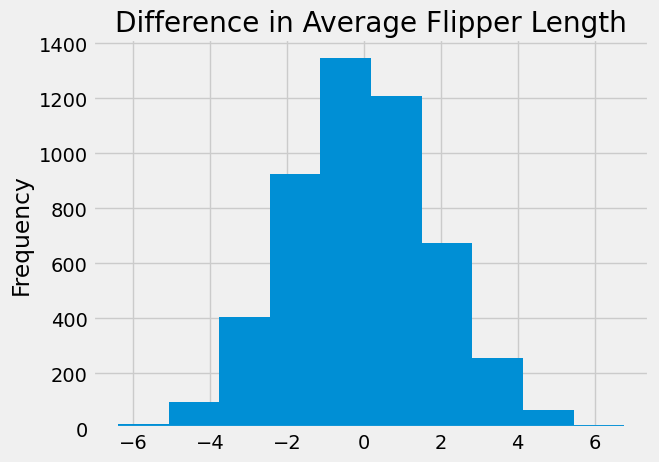

In [14]:
penguins_small = penguins.loc[(penguins.species == 'Chinstrap') | (penguins.species == 'Gentoo')]

flippers = penguins_small[['flipper_length_mm']]
species_labels = penguins_small['species'].values

differences = np.array([])

for i in np.arange(5000):
    shuffled_flippers = flippers.sample(len(flippers),replace=False)['flipper_length_mm'].values
    shuffled_df=pd.DataFrame({"Shuffled Flippers":shuffled_flippers,"Label":species_labels})
    test_stat = np.mean(shuffled_df[shuffled_df['Label']=="Gentoo"]['Shuffled Flippers']) - np.mean(shuffled_df[shuffled_df['Label']=="Chinstrap"]['Shuffled Flippers']) 
    differences = np.append(differences, test_stat)
    
plt.hist(differences)
plt.title("Difference in Average Flipper Length")
plt.ylabel("Frequency")
plt.xlim([-6, 22])
plt.scatter(my_test_stat, -30, color='red', s=50);

Does our test statistic look like it comes from this distribution of test statistics created assuming the null hypothesis is true? 

Let's calculate the p-value for our one-sided alternative

In [ ]:
p_value = sum(differences >= my_test_stat)/5000
p_value

This looks weird, but makes sense...

What is the p-value if we are testing the one-sided alternative? What decision should we make based on that p-value and a significance level of 0.05? Does our decision change if we use the two-sided alternative?

The p-value 0 so we would reject the null given a significance level of 0.05.

The p-value stays 0 if we conduct a two-sided test!

Now, what about something less straightforward?

Let's compare the body mass of Adelie and Chinstrap penguins using the following hypotheses:

H0: Adelie body mass == body mass

HA: Adelie body mass < Chinstrap body mass

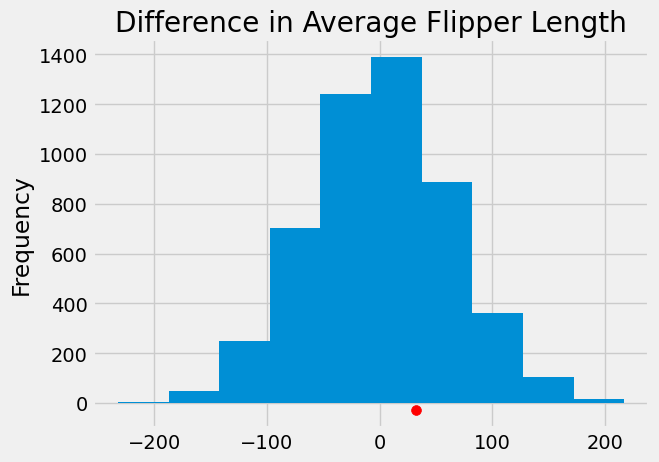

In [20]:
my_test_stat = np.mean(penguins[penguins['species']=="Chinstrap"]['body_mass_g']) - np.mean(penguins[penguins['species']=="Adelie"]['body_mass_g'])

penguins_small = penguins.loc[(penguins.species == 'Chinstrap') | (penguins.species == 'Adelie')]

mass = penguins_small[['body_mass_g']]
species_labels = penguins_small['species'].values

differences = np.array([])

for i in np.arange(5000):
    shuffled_mass = mass.sample(len(flippers),replace=False)['body_mass_g'].values
    shuffled_df=pd.DataFrame({"Shuffled Mass":shuffled_mass,"Label":species_labels})
    test_stat = np.mean(shuffled_df[shuffled_df['Label']=="Chinstrap"]['Shuffled Mass']) - np.mean(shuffled_df[shuffled_df['Label']=="Adelie"]['Shuffled Mass']) 
    differences = np.append(differences, test_stat)
    
plt.hist(differences)
plt.title("Difference in Average Flipper Length");
plt.ylabel("Frequency");
plt.scatter(my_test_stat, -30, color='red', s=50);

Now, does our test statistic look like it comes from this distribution of test statistics created assuming the null hypothesis is true?

Yes!

Let's check the p-value

In [21]:
p_value = sum(differences >= my_test_stat)/5000
p_value

0.3046

So we cannot reject the null hypothesis at the 0.05 significance level.